In [85]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
plt.style.use('ggplot')

In [86]:
train = pd.read_csv('bike.csv'); train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [87]:
train.info() # 회귀분석을 위해서 datatime을 숫자로 바꿔야함

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [88]:
train['datetime']

0        2011-01-01 00:00:00
1        2011-01-01 01:00:00
2        2011-01-01 02:00:00
3        2011-01-01 03:00:00
4        2011-01-01 04:00:00
                ...         
10881    2012-12-19 19:00:00
10882    2012-12-19 20:00:00
10883    2012-12-19 21:00:00
10884    2012-12-19 22:00:00
10885    2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: object

In [89]:
train['datetime'] = pd.to_datetime(train['datetime'])

In [90]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [91]:
train['datetime'].loc[5]

Timestamp('2011-01-01 05:00:00')

In [92]:
train['datetime'].loc[5].year

2011

In [93]:
train['datetime'].loc[5].month

1

In [94]:
train['datetime'].loc[5].day

1

In [95]:
train['datetime'].loc[5].hour

5

In [96]:
train['datetime'].loc[5].minute

0

In [97]:
train['datetime'].loc[5].second

0

In [98]:
train['datetime'].dt.year

0        2011
1        2011
2        2011
3        2011
4        2011
         ... 
10881    2012
10882    2012
10883    2012
10884    2012
10885    2012
Name: datetime, Length: 10886, dtype: int64

In [99]:
type(train['datetime'].dt)

pandas.core.indexes.accessors.DatetimeProperties

In [100]:
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['dayofweek'] = train['datetime'].dt.dayofweek

In [101]:
train.drop(['datetime'], axis=1, inplace = True)

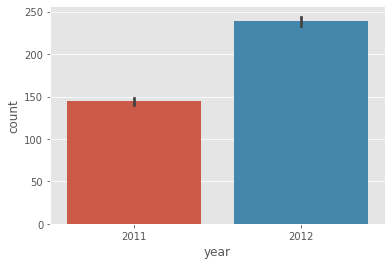

In [102]:
plt.style.use('ggplot')
sns.barplot(data = train, x = 'year', y = 'count')

In [103]:
train['day'].value_counts()

1     575
9     575
5     575
17    575
15    574
19    574
16    574
7     574
8     574
4     574
13    574
14    574
3     573
2     573
12    573
10    572
6     572
11    568
18    563
Name: day, dtype: int64

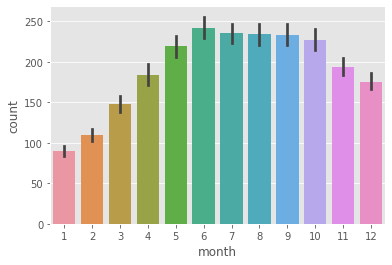

In [104]:
plt.style.use('ggplot')
sns.barplot(data = train, x = 'month', y = 'count')

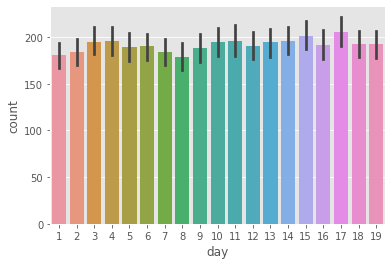

In [105]:
plt.style.use('ggplot')
sns.barplot(data = train, x = 'day', y = 'count')

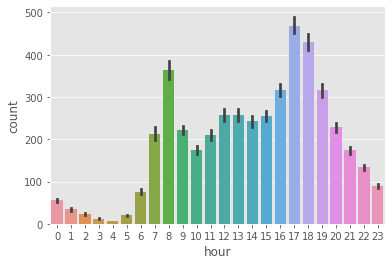

In [106]:
plt.style.use('ggplot')
sns.barplot(data = train, x = 'hour', y = 'count')

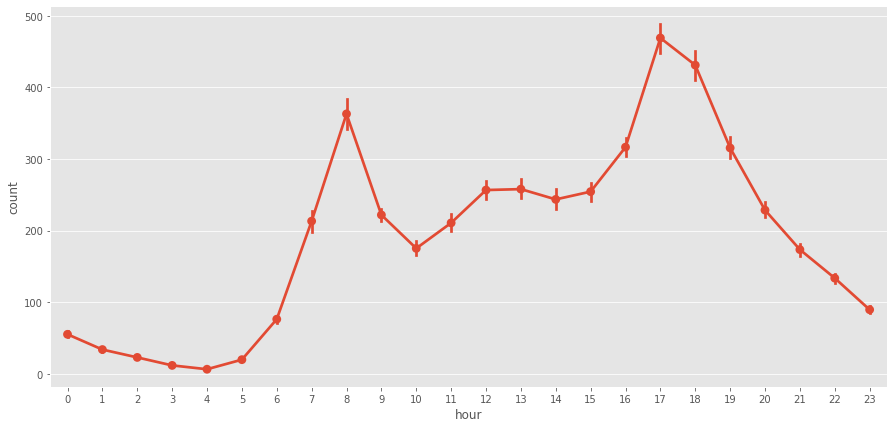

In [107]:
plt.style.use('ggplot')
plt.figure(figsize = (15, 7))
sns.pointplot(data = train, x = 'hour', y = 'count')

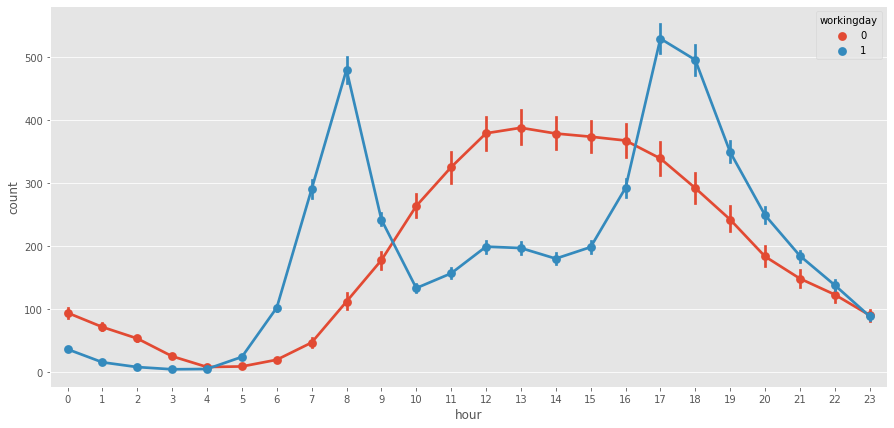

In [108]:
plt.style.use('ggplot')
plt.figure(figsize = (15, 7))
sns.pointplot(data = train, x = 'hour', y = 'count', hue = 'workingday')

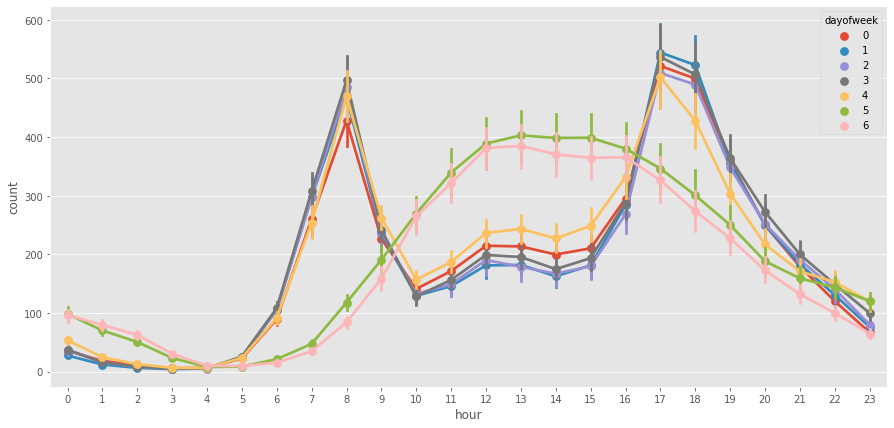

In [109]:
plt.style.use('ggplot')
plt.figure(figsize = (15, 7))
sns.pointplot(data = train, x = 'hour', y = 'count', hue = 'dayofweek')

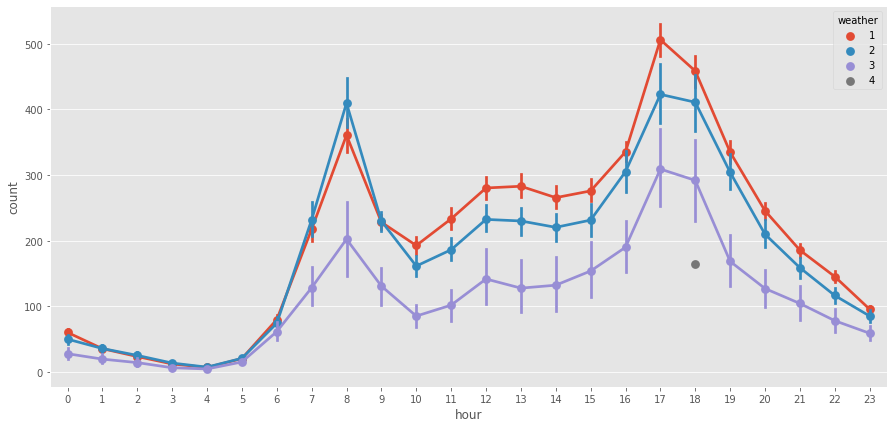

In [110]:
plt.style.use('ggplot')
plt.figure(figsize = (15, 7))
sns.pointplot(data = train, x = 'hour', y = 'count', hue = 'weather')

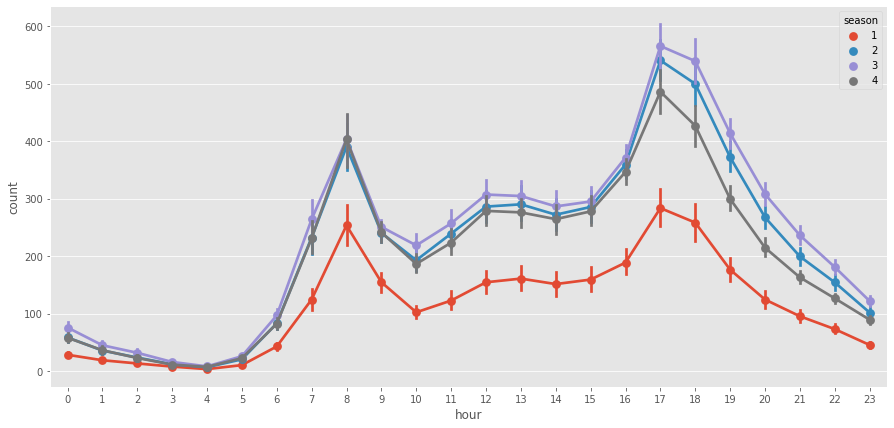

In [111]:
plt.style.use('ggplot')
plt.figure(figsize = (15, 7))
sns.pointplot(data = train, x = 'hour', y = 'count', hue = 'season')

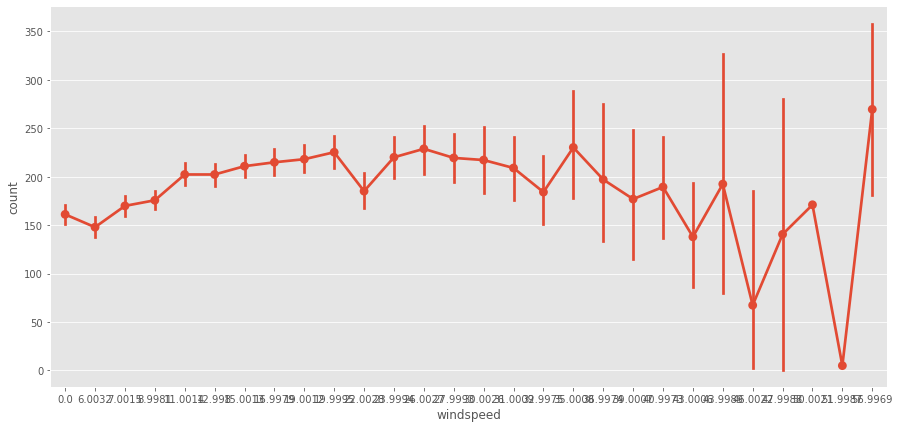

In [112]:
plt.style.use('ggplot')
plt.figure(figsize = (15, 7))
sns.pointplot(data = train, x = 'windspeed', y = 'count')

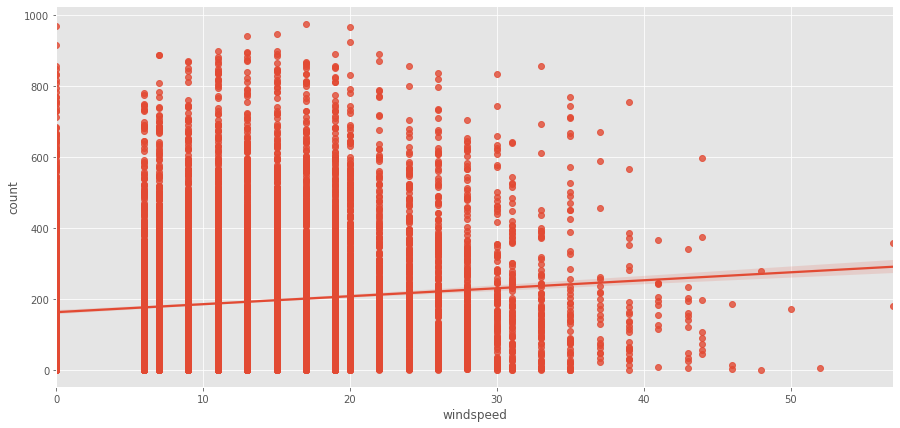

In [113]:
plt.style.use('ggplot')
plt.figure(figsize = (15, 7))
sns.regplot(data = train, x = 'windspeed', y = 'count')

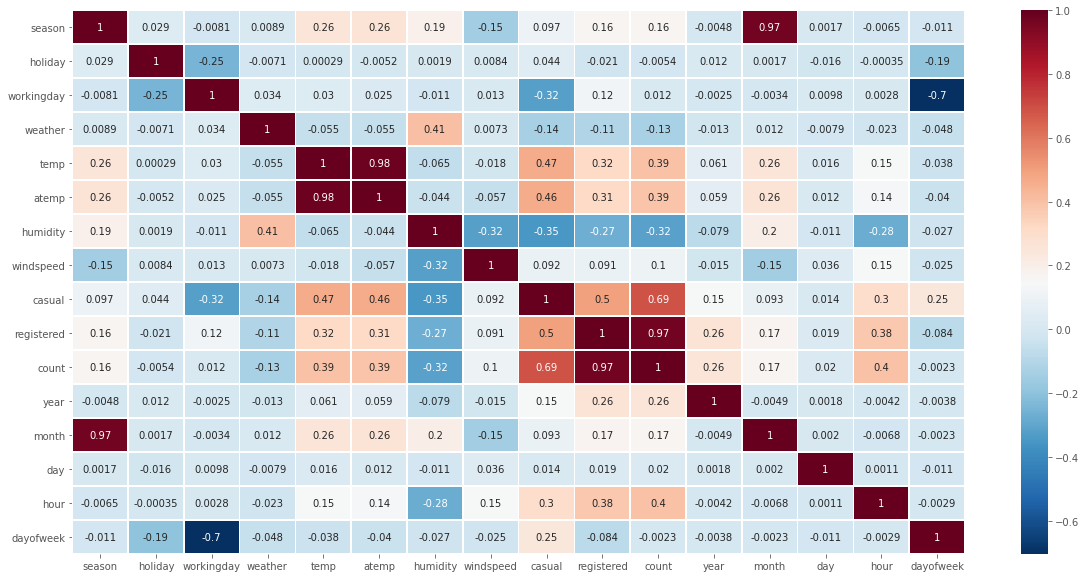

In [114]:
plt.style.use('ggplot')
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
sns.heatmap(train.corr(), annot=True, cmap='RdBu_r', linewidths= 0.5)

In [115]:
train

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek
0,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,5
1,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,5
2,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,5
3,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,5
4,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,2
10882,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,2
10883,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,2
10884,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,2


In [116]:
train.corr()['temp'] # 다중공선성 검사 꼭하기(유의미한 결과는 10초과)

season        0.258689
holiday       0.000295
workingday    0.029966
weather      -0.055035
temp          1.000000
atemp         0.984948
humidity     -0.064949
windspeed    -0.017852
casual        0.467097
registered    0.318571
count         0.394454
year          0.061226
month         0.257589
day           0.015551
hour          0.145430
dayofweek    -0.038466
Name: temp, dtype: float64

# 아무 전처리 없이 예측

In [117]:
X = train.copy()
y = train['count']

In [118]:
X

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek
0,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,5
1,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,5
2,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,5
3,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,5
4,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,2
10882,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,2
10883,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,2
10884,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,2


In [119]:
y

0         16
1         40
2         32
3         13
4          1
        ... 
10881    336
10882    241
10883    168
10884    129
10885     88
Name: count, Length: 10886, dtype: int64

In [120]:
X.pop('count')

0         16
1         40
2         32
3         13
4          1
        ... 
10881    336
10882    241
10883    168
10884    129
10885     88
Name: count, Length: 10886, dtype: int64

In [121]:
X

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,year,month,day,hour,dayofweek
0,1,0,0,1,9.84,14.395,81,0.0000,3,13,2011,1,1,0,5
1,1,0,0,1,9.02,13.635,80,0.0000,8,32,2011,1,1,1,5
2,1,0,0,1,9.02,13.635,80,0.0000,5,27,2011,1,1,2,5
3,1,0,0,1,9.84,14.395,75,0.0000,3,10,2011,1,1,3,5
4,1,0,0,1,9.84,14.395,75,0.0000,0,1,2011,1,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,7,329,2012,12,19,19,2
10882,4,0,1,1,14.76,17.425,57,15.0013,10,231,2012,12,19,20,2
10883,4,0,1,1,13.94,15.910,61,15.0013,4,164,2012,12,19,21,2
10884,4,0,1,1,13.94,17.425,61,6.0032,12,117,2012,12,19,22,2


In [122]:
# 얘네 두개가 있으면 안됨
X.pop('registered')
X.pop('casual')

0         3
1         8
2         5
3         3
4         0
         ..
10881     7
10882    10
10883     4
10884    12
10885     4
Name: casual, Length: 10886, dtype: int64

In [123]:
X

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,dayofweek
0,1,0,0,1,9.84,14.395,81,0.0000,2011,1,1,0,5
1,1,0,0,1,9.02,13.635,80,0.0000,2011,1,1,1,5
2,1,0,0,1,9.02,13.635,80,0.0000,2011,1,1,2,5
3,1,0,0,1,9.84,14.395,75,0.0000,2011,1,1,3,5
4,1,0,0,1,9.84,14.395,75,0.0000,2011,1,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,2012,12,19,19,2
10882,4,0,1,1,14.76,17.425,57,15.0013,2012,12,19,20,2
10883,4,0,1,1,13.94,15.910,61,15.0013,2012,12,19,21,2
10884,4,0,1,1,13.94,17.425,61,6.0032,2012,12,19,22,2


In [124]:
X.pop('day') # day는 지우는 이유가 train 파일에는 1~19일 밖에 없고 나머지 20~말일까지는 test에 있음 즉, 1~19로만 학습을 하면 20~말일은 제대로 못함

0         1
1         1
2         1
3         1
4         1
         ..
10881    19
10882    19
10883    19
10884    19
10885    19
Name: day, Length: 10886, dtype: int64

In [125]:
X

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,hour,dayofweek
0,1,0,0,1,9.84,14.395,81,0.0000,2011,1,0,5
1,1,0,0,1,9.02,13.635,80,0.0000,2011,1,1,5
2,1,0,0,1,9.02,13.635,80,0.0000,2011,1,2,5
3,1,0,0,1,9.84,14.395,75,0.0000,2011,1,3,5
4,1,0,0,1,9.84,14.395,75,0.0000,2011,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,2012,12,19,2
10882,4,0,1,1,14.76,17.425,57,15.0013,2012,12,20,2
10883,4,0,1,1,13.94,15.910,61,15.0013,2012,12,21,2
10884,4,0,1,1,13.94,17.425,61,6.0032,2012,12,22,2


In [126]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,  y, test_size = 0.2, random_state = 156)

In [127]:
from sklearn.linear_model import LinearRegression
lModel = LinearRegression()

In [128]:
lModel.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [129]:
pred = lModel.predict(X_train)

In [130]:
lModel.score(X_train, y_train) # R_square

0.3808472999618411

In [131]:
from sklearn.metrics import mean_squared_error

In [132]:
mean_squared_error(y_train, pred)**0.5

143.00375924493244

# 이상치제거

In [133]:
q1 = np.percentile(train['count'], 25)

In [134]:
q3 = np.percentile(train['count'], 75)

In [135]:
IQR = q3 - q1

In [136]:
trainWithoutOutliers = train[(train['count']>=q1 - (1.5*IQR)) & (train['count']<=(q3+1.5*IQR))]; trainWithoutOutliers

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek
0,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,5
1,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,5
2,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,5
3,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,5
4,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,2
10882,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,2
10883,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,2
10884,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,2


In [137]:
trainOutliers = train[(train['count'] < (q1 - 1.5 * IQR)) | (train['count'] > (q3 + 1.5 * IQR))]; trainOutliers

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek
6611,1,0,1,2,24.60,31.060,43,12.9980,89,623,712,2012,3,12,18,0
6634,1,0,1,1,28.70,31.820,37,7.0015,62,614,676,2012,3,13,17,1
6635,1,0,1,1,28.70,31.820,34,19.9995,96,638,734,2012,3,13,18,1
6649,1,0,1,1,18.04,21.970,82,0.0000,34,628,662,2012,3,14,8,2
6658,1,0,1,1,28.70,31.820,28,6.0032,140,642,782,2012,3,14,17,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,4,0,1,2,13.94,15.150,61,19.9995,16,708,724,2012,12,11,8,1
10702,4,0,1,2,10.66,12.880,65,11.0014,18,670,688,2012,12,12,8,2
10726,4,0,1,1,9.84,11.365,60,12.9980,24,655,679,2012,12,13,8,3
10846,4,0,1,1,15.58,19.695,94,0.0000,10,652,662,2012,12,18,8,1


In [138]:
train = trainWithoutOutliers.copy()

In [139]:
train.index = range(len(train))

# 데이터 정규화

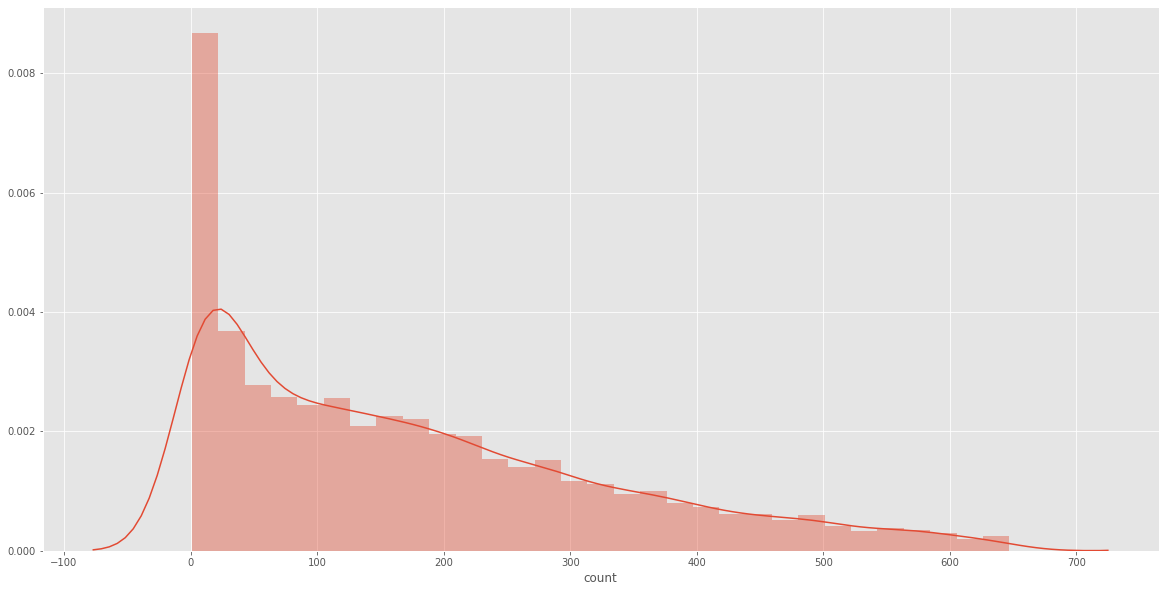

In [140]:
plt.style.use('ggplot')
plt.figure(figsize = (20, 10))
sns.distplot(train['count'])

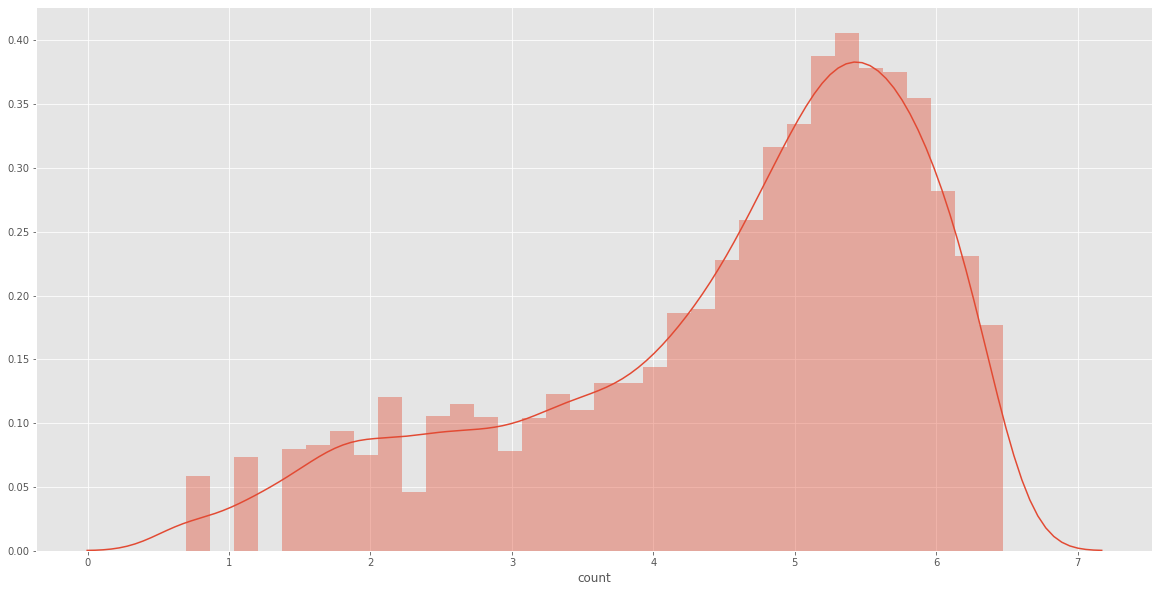

In [141]:
train['count'] = np.log1p(train['count'])
plt.figure(figsize = (20, 10))
sns.distplot(train['count'])

In [142]:
y = train['count']
y.head()

0    2.833213
1    3.713572
2    3.496508
3    2.639057
4    0.693147
Name: count, dtype: float64

In [143]:
X = train

In [144]:
X

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek
0,1,0,0,1,9.84,14.395,81,0.0000,3,13,2.833213,2011,1,1,0,5
1,1,0,0,1,9.02,13.635,80,0.0000,8,32,3.713572,2011,1,1,1,5
2,1,0,0,1,9.02,13.635,80,0.0000,5,27,3.496508,2011,1,1,2,5
3,1,0,0,1,9.84,14.395,75,0.0000,3,10,2.639057,2011,1,1,3,5
4,1,0,0,1,9.84,14.395,75,0.0000,0,1,0.693147,2011,1,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10581,4,0,1,1,15.58,19.695,50,26.0027,7,329,5.820083,2012,12,19,19,2
10582,4,0,1,1,14.76,17.425,57,15.0013,10,231,5.488938,2012,12,19,20,2
10583,4,0,1,1,13.94,15.910,61,15.0013,4,164,5.129899,2012,12,19,21,2
10584,4,0,1,1,13.94,17.425,61,6.0032,12,117,4.867534,2012,12,19,22,2


In [145]:
X.pop('count')
X.pop('registered')
X.pop('day')
X.pop('casual')

0         3
1         8
2         5
3         3
4         0
         ..
10581     7
10582    10
10583     4
10584    12
10585     4
Name: casual, Length: 10586, dtype: int64

In [146]:
X

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,hour,dayofweek
0,1,0,0,1,9.84,14.395,81,0.0000,2011,1,0,5
1,1,0,0,1,9.02,13.635,80,0.0000,2011,1,1,5
2,1,0,0,1,9.02,13.635,80,0.0000,2011,1,2,5
3,1,0,0,1,9.84,14.395,75,0.0000,2011,1,3,5
4,1,0,0,1,9.84,14.395,75,0.0000,2011,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
10581,4,0,1,1,15.58,19.695,50,26.0027,2012,12,19,2
10582,4,0,1,1,14.76,17.425,57,15.0013,2012,12,20,2
10583,4,0,1,1,13.94,15.910,61,15.0013,2012,12,21,2
10584,4,0,1,1,13.94,17.425,61,6.0032,2012,12,22,2


In [147]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 156)

In [148]:
from sklearn.linear_model import LinearRegression
lModel = LinearRegression()
lModel.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [149]:
pred = lModel.predict(X_train)

In [150]:
lModel.score(X_train, y_train)

0.4743432028722757

In [151]:
from sklearn.metrics import mean_squared_error
print('MSE :',mean_squared_error(y_train, pred))

MSE : 1.0196284020589537


In [152]:
pred = lModel.predict(X_test)
print('MSE :', mean_squared_error(y_test, pred))

MSE : 0.9993991374857144


In [153]:
lModel.score(X_test, y_test)

0.500240815807653

# 결측치 처리

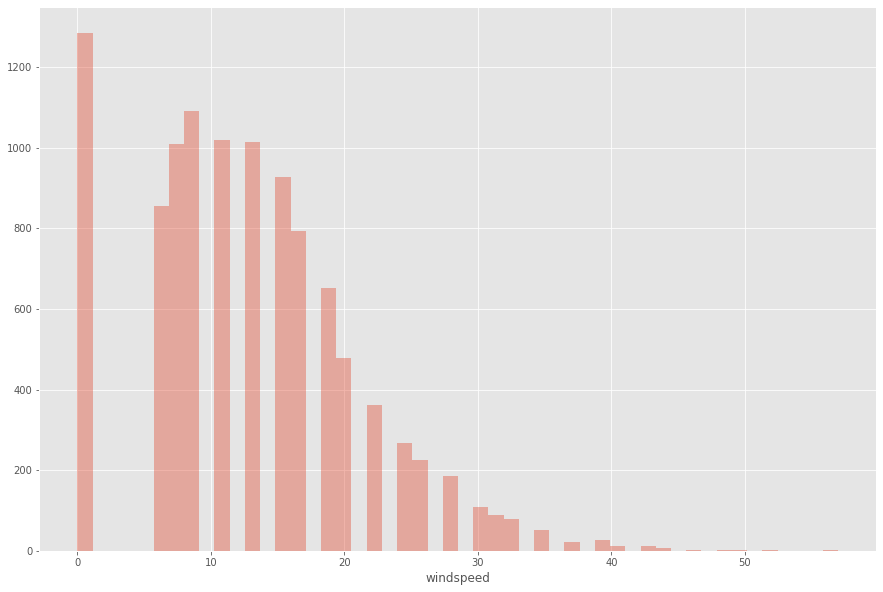

In [154]:
plt.style.use('ggplot')
plt.figure(figsize=(15, 10))
sns.distplot(train['windspeed'], kde = False) # kde = False하면 비율로 보여주는 것이 아니라 몇 개인지 알려줌

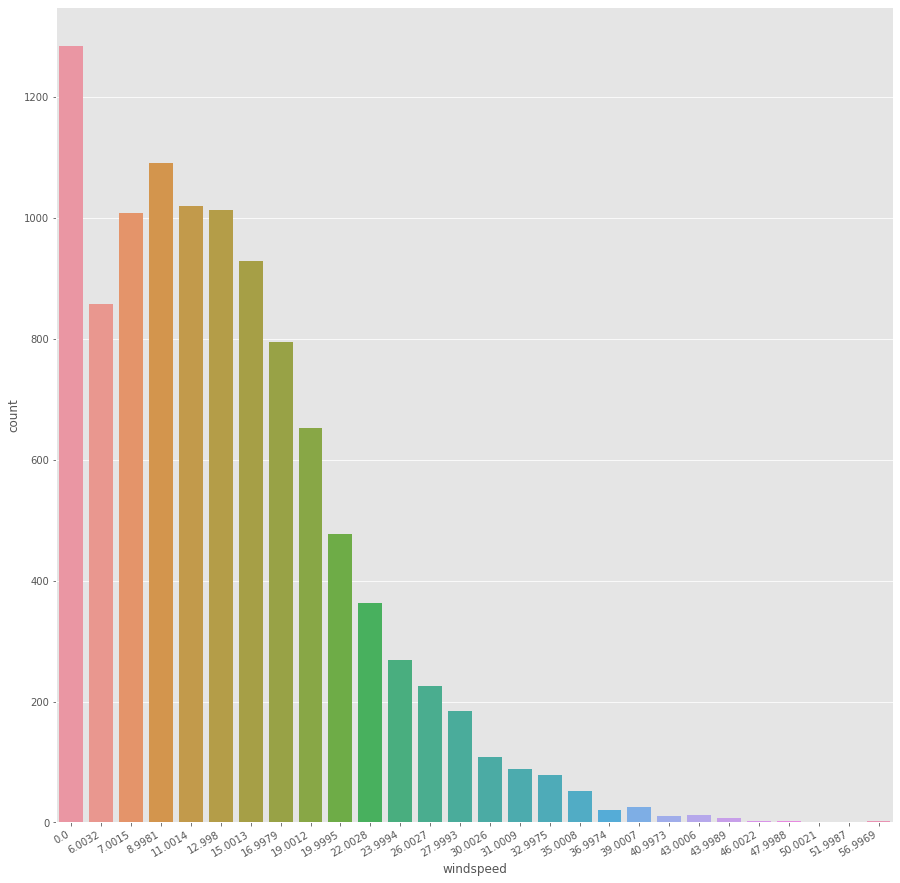

In [155]:
plt.figure(figsize = (15, 15))
plt.xticks(rotation = 30, ha = 'right')
sns.countplot(data = train, x = 'windspeed')

In [156]:
trainWind0 = train[train['windspeed'] == 0]; trainWind0

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,hour,dayofweek
0,1,0,0,1,9.84,14.395,81,0.0,2011,1,0,5
1,1,0,0,1,9.02,13.635,80,0.0,2011,1,1,5
2,1,0,0,1,9.02,13.635,80,0.0,2011,1,2,5
3,1,0,0,1,9.84,14.395,75,0.0,2011,1,3,5
4,1,0,0,1,9.84,14.395,75,0.0,2011,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
10525,4,0,1,2,16.40,20.455,87,0.0,2012,12,9,0
10528,4,0,1,2,16.40,20.455,87,0.0,2012,12,12,0
10531,4,0,1,2,17.22,21.210,88,0.0,2012,12,15,0
10561,4,0,1,1,13.94,16.665,49,0.0,2012,12,22,1


In [157]:
trainWindNot0 = train[train['windspeed'] != 0]; trainWindNot0

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,hour,dayofweek
5,1,0,0,2,9.84,12.880,75,6.0032,2011,1,5,5
10,1,0,0,1,15.58,19.695,76,16.9979,2011,1,10,5
11,1,0,0,1,14.76,16.665,81,19.0012,2011,1,11,5
12,1,0,0,1,17.22,21.210,77,19.0012,2011,1,12,5
13,1,0,0,2,18.86,22.725,72,19.9995,2011,1,13,5
...,...,...,...,...,...,...,...,...,...,...,...,...
10581,4,0,1,1,15.58,19.695,50,26.0027,2012,12,19,2
10582,4,0,1,1,14.76,17.425,57,15.0013,2012,12,20,2
10583,4,0,1,1,13.94,15.910,61,15.0013,2012,12,21,2
10584,4,0,1,1,13.94,17.425,61,6.0032,2012,12,22,2


In [158]:
X = train.copy()
X[X['windspeed']==0]
X.loc[X['windspeed'] == 0, 'windspeed'] = trainWindNot0['windspeed'].mean()

In [159]:
X

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,hour,dayofweek
0,1,0,0,1,9.84,14.395,81,14.541892,2011,1,0,5
1,1,0,0,1,9.02,13.635,80,14.541892,2011,1,1,5
2,1,0,0,1,9.02,13.635,80,14.541892,2011,1,2,5
3,1,0,0,1,9.84,14.395,75,14.541892,2011,1,3,5
4,1,0,0,1,9.84,14.395,75,14.541892,2011,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
10581,4,0,1,1,15.58,19.695,50,26.002700,2012,12,19,2
10582,4,0,1,1,14.76,17.425,57,15.001300,2012,12,20,2
10583,4,0,1,1,13.94,15.910,61,15.001300,2012,12,21,2
10584,4,0,1,1,13.94,17.425,61,6.003200,2012,12,22,2


In [160]:
trainWindNot0.corr()['windspeed']

season       -0.140208
holiday       0.014118
workingday    0.024542
weather      -0.013292
temp         -0.042953
atemp        -0.073297
humidity     -0.330703
windspeed     1.000000
year         -0.038701
month        -0.145009
hour          0.126009
dayofweek    -0.031660
Name: windspeed, dtype: float64

In [161]:
from sklearn.ensemble import RandomForestClassifier

def predict_windspeed(data):
  dataWind0 = data[data['windspeed'] == 0]
  dataWindNot0 = data[data['windspeed'] != 0]

  wCol = ['season', 'weather', 'humidity', 'month', 'temp', 'year', 'atemp']

  dataWindNot0['windspeed'] = dataWindNot0['windspeed'].astype('str')

  rfModel_wind = RandomForestClassifier()
  rfModel_wind.fit(dataWindNot0[wCol], dataWindNot0['windspeed'])

  wind0Values = rfModel_wind.predict(X = dataWind0[wCol])
  predictWind0 = dataWind0
  predictWindNot0 = dataWindNot0

  predictWind0['windspeed'] = wind0Values
  data = pd.concat([predictWind0, predictWindNot0])

  data['windspeed'] = data['windspeed'].astype('float')

  return data

In [162]:
X = predict_windspeed(train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 156)

In [164]:
from sklearn.linear_model import LinearRegression
lModel = LinearRegression()

In [165]:
lModel.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [166]:
pred = lModel.predict(X_train)

In [167]:
lModel.score(X_train, y_train)

0.024933120780759488

In [168]:
from sklearn.metrics import mean_squared_error
print('MSE :', mean_squared_error(y_train, pred))

MSE : 1.891359323024891


### RandomForestRegressor로 풍속 예측

In [169]:
# RandomForestRegressor : 회귀값을 예측하는 객체
# RandomForestClassifier : 분류하는 객체
from sklearn.ensemble import RandomForestRegressor

In [170]:
train

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,hour,dayofweek
0,1,0,0,1,9.84,14.395,81,0.0000,2011,1,0,5
1,1,0,0,1,9.02,13.635,80,0.0000,2011,1,1,5
2,1,0,0,1,9.02,13.635,80,0.0000,2011,1,2,5
3,1,0,0,1,9.84,14.395,75,0.0000,2011,1,3,5
4,1,0,0,1,9.84,14.395,75,0.0000,2011,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
10581,4,0,1,1,15.58,19.695,50,26.0027,2012,12,19,2
10582,4,0,1,1,14.76,17.425,57,15.0013,2012,12,20,2
10583,4,0,1,1,13.94,15.910,61,15.0013,2012,12,21,2
10584,4,0,1,1,13.94,17.425,61,6.0032,2012,12,22,2


In [171]:
data = train.copy()

In [173]:
dataWind0 = data[data['windspeed'] == 0]

In [175]:
dataWindNot0 = data[data['windspeed'] != 0]

In [176]:
wCol = ['season', 'weather', 'humidity', 'month', 'temp', 'year', 'atemp']; wCol

['season', 'weather', 'humidity', 'month', 'temp', 'year', 'atemp']

In [177]:
dataWindNot0[wCol]

,season,weather,humidity,month,temp,year,atemp
5,1,2,75,1,9.84,2011,12.880
10,1,1,76,1,15.58,2011,19.695
11,1,1,81,1,14.76,2011,16.665
12,1,1,77,1,17.22,2011,21.210
13,1,2,72,1,18.86,2011,22.725
...,...,...,...,...,...,...,...
10581,4,1,50,12,15.58,2012,19.695
10582,4,1,57,12,14.76,2012,17.425
10583,4,1,61,12,13.94,2012,15.910
10584,4,1,61,12,13.94,2012,17.425


In [178]:
dataWindNot0['windspeed']

5         6.0032
10       16.9979
11       19.0012
12       19.0012
13       19.9995
          ...   
10581    26.0027
10582    15.0013
10583    15.0013
10584     6.0032
10585     8.9981
Name: windspeed, Length: 9301, dtype: float64

In [189]:
X_train, X_test, y_train, y_test = train_test_split(dataWindNot0[wCol], dataWindNot0['windspeed'], test_size = 0.2)
before_rfc = RandomForestRegressor()
before_rfc.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [201]:
pred = before_rfc.predict(X_test)

In [204]:
from sklearn.metrics import mean_squared_error
print('average :', dataWindNot0['windspeed'].mean())
print('MES :',mean_squared_error(y_test, pred))
print('RMES :', mean_squared_error(y_test, pred)**0.5)
print('R_squre :', before_rfc.score(X_test, y_test))

average : 14.541892215891192
MES : 28.271928848094106
RMES : 5.317135398698636
R_squre : 0.3926008904389392


In [179]:
rfc = RandomForestRegressor()

In [180]:
rfc.fit(dataWindNot0[wCol], dataWindNot0['windspeed'])

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [181]:
rfc.estimators_[0]

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1546127282, splitter='best')

In [182]:
import pydotplus

In [183]:
from sklearn import tree

In [184]:
dt_dot_data = tree.export_graphviz(
    rfc.estimators_[0],
    feature_names = wCol,
    special_characters = True,
    filled = True,
    rounded = True
)

In [185]:
dt_dot_data

'digraph Tree {\nnode [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;\nedge [fontname=helvetica] ;\n0 [label=<humidity &le; 53.5<br/>mse = 49.522<br/>samples = 5874<br/>value = 14.575>, fillcolor="#fae5d7"] ;\n1 [label=<month &le; 4.5<br/>mse = 55.349<br/>samples = 2224<br/>value = 17.383>, fillcolor="#f8ddc9"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label=<humidity &le; 42.5<br/>mse = 65.641<br/>samples = 1067<br/>value = 19.077>, fillcolor="#f7d8c1"] ;\n1 -> 2 ;\n3 [label=<atemp &le; 10.227<br/>mse = 68.227<br/>samples = 608<br/>value = 20.65>, fillcolor="#f6d3ba"] ;\n2 -> 3 ;\n4 [label=<temp &le; 8.61<br/>mse = 56.006<br/>samples = 97<br/>value = 24.183>, fillcolor="#f4c8a9"] ;\n3 -> 4 ;\n5 [label=<atemp &le; 8.713<br/>mse = 55.176<br/>samples = 82<br/>value = 23.127>, fillcolor="#f4ccae"] ;\n4 -> 5 ;\n6 [label=<temp &le; 6.15<br/>mse = 50.334<br/>samples = 57<br/>value = 25.283>, fillcolor="#f3c5a4"] ;\n5 -> 6 ;\n7 [label=<temp

In [186]:
dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)

In [187]:
dt_graph.write_pdf('windspeed01.pdf')

True

In [188]:
dataWind0[wCol]

,season,weather,humidity,month,temp,year,atemp
0,1,1,81,1,9.84,2011,14.395
1,1,1,80,1,9.02,2011,13.635
2,1,1,80,1,9.02,2011,13.635
3,1,1,75,1,9.84,2011,14.395
4,1,1,75,1,9.84,2011,14.395
...,...,...,...,...,...,...,...
10525,4,2,87,12,16.40,2012,20.455
10528,4,2,87,12,16.40,2012,20.455
10531,4,2,88,12,17.22,2012,21.210
10561,4,1,49,12,13.94,2012,16.665


In [195]:
pred = rfc.predict(dataWind0[wCol]); pred

array([ 9.12251565,  9.56825325,  9.56825325, ..., 10.25536277,
       12.238287  ,  6.85857895])

In [196]:
dataWind0['windspeed'] = pred

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [197]:
dataWind0

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,hour,dayofweek
0,1,0,0,1,9.84,14.395,81,9.122516,2011,1,0,5
1,1,0,0,1,9.02,13.635,80,9.568253,2011,1,1,5
2,1,0,0,1,9.02,13.635,80,9.568253,2011,1,2,5
3,1,0,0,1,9.84,14.395,75,6.761908,2011,1,3,5
4,1,0,0,1,9.84,14.395,75,6.761908,2011,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
10525,4,0,1,2,16.40,20.455,87,10.844291,2012,12,9,0
10528,4,0,1,2,16.40,20.455,87,10.844291,2012,12,12,0
10531,4,0,1,2,17.22,21.210,88,10.255363,2012,12,15,0
10561,4,0,1,1,13.94,16.665,49,12.238287,2012,12,22,1


In [198]:
data = pd.concat([dataWind0, dataWindNot0]); data

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,hour,dayofweek
0,1,0,0,1,9.84,14.395,81,9.122516,2011,1,0,5
1,1,0,0,1,9.02,13.635,80,9.568253,2011,1,1,5
2,1,0,0,1,9.02,13.635,80,9.568253,2011,1,2,5
3,1,0,0,1,9.84,14.395,75,6.761908,2011,1,3,5
4,1,0,0,1,9.84,14.395,75,6.761908,2011,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
10581,4,0,1,1,15.58,19.695,50,26.002700,2012,12,19,2
10582,4,0,1,1,14.76,17.425,57,15.001300,2012,12,20,2
10583,4,0,1,1,13.94,15.910,61,15.001300,2012,12,21,2
10584,4,0,1,1,13.94,17.425,61,6.003200,2012,12,22,2


In [199]:
data.sort_index(inplace = True)

In [205]:
X = data.copy(); X

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,hour,dayofweek
0,1,0,0,1,9.84,14.395,81,9.122516,2011,1,0,5
1,1,0,0,1,9.02,13.635,80,9.568253,2011,1,1,5
2,1,0,0,1,9.02,13.635,80,9.568253,2011,1,2,5
3,1,0,0,1,9.84,14.395,75,6.761908,2011,1,3,5
4,1,0,0,1,9.84,14.395,75,6.761908,2011,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
10581,4,0,1,1,15.58,19.695,50,26.002700,2012,12,19,2
10582,4,0,1,1,14.76,17.425,57,15.001300,2012,12,20,2
10583,4,0,1,1,13.94,15.910,61,15.001300,2012,12,21,2
10584,4,0,1,1,13.94,17.425,61,6.003200,2012,12,22,2


In [206]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 156)

In [207]:
from sklearn.linear_model import LinearRegression
lModel = LinearRegression()
lModel.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [208]:
pred = lModel.predict(X_train)

In [210]:
lModel.score(X_train, y_train)

0.4742405112161576

In [211]:
from sklearn.metrics import mean_squared_error
print('MSE :', mean_squared_error(y_train, pred))

MSE : 1.0198275953915705


In [212]:
pred = lModel.predict(X_test)
lModel.score(X_test, y_test)

0.5002135723613916

In [213]:
print('MSE :', mean_squared_error(y_test, pred))

MSE : 0.9994536178785852


In [216]:
dataWindNot0['windspeed'].std()

7.096727241369489

# 칼럼 추가

## peak 추가

In [217]:
train['peak'] = 0

In [218]:
for index in range(len(train)):
  workingday = train.loc[index, 'workingday']
  hour = train.loc[index, 'hour']
  print('index :', index)
  print('workingday :', workingday)
  print('hour :', hour)
  print('='*100)
  if workingday == 1:
    if hour == 8 or (17 <= hour <= 18):
      train.loc[index, 'peak'] = 1
  else:
    if 10 <= hour <= 19:
      train.loc[index, 'peak'] = 1

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
workingday : 1
hour : 4
index : 9337
workingday : 1
hour : 5
index : 9338
workingday : 1
hour : 6
index : 9339
workingday : 1
hour : 7
index : 9340
workingday : 1
hour : 9
index : 9341
workingday : 1
hour : 10
index : 9342
workingday : 1
hour : 11
index : 9343
workingday : 1
hour : 12
index : 9344
workingday : 1
hour : 13
index : 9345
workingday : 1
hour : 14
index : 9346
workingday : 1
hour : 15
index : 9347
workingday : 1
hour : 16
index : 9348
workingday : 1
hour : 19
index : 9349
workingday : 1
hour : 20
index : 9350
workingday : 1
hour : 21
index : 9351
workingday : 1
hour : 22
index : 9352
workingday : 1
hour : 23
index : 9353
workingday : 1
hour : 0
index : 9354
workingday : 1
hour : 1
index : 9355
workingday : 1
hour : 2
index : 9356
workingday : 1
hour : 3
index : 9357
workingday : 1
hour : 4
index : 9358
workingday : 1
hour : 5
index : 9359
workingday : 1
hour : 6
index : 9360
workingday : 1
hour : 7
index : 9361
workingday : 1
hour : 9
ind

In [219]:
train[train['peak'] == 1]

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,hour,dayofweek,peak
10,1,0,0,1,15.58,19.695,76,16.9979,2011,1,10,5,1
11,1,0,0,1,14.76,16.665,81,19.0012,2011,1,11,5,1
12,1,0,0,1,17.22,21.210,77,19.0012,2011,1,12,5,1
13,1,0,0,2,18.86,22.725,72,19.9995,2011,1,13,5,1
14,1,0,0,2,18.86,22.725,72,19.0012,2011,1,14,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10534,4,0,1,2,16.40,20.455,94,6.0032,2012,12,18,0,1
10556,4,0,1,1,16.40,20.455,47,30.0026,2012,12,17,1,1
10557,4,0,1,1,15.58,19.695,46,22.0028,2012,12,18,1,1
10579,4,0,1,1,16.40,20.455,50,26.0027,2012,12,17,2,1


## ideal 추가

In [220]:
train['ideal'] = 0

In [222]:
for index in range(len(train)):
  if (train.loc[index, 'temp'] > 27) & (train.loc[index, 'windspeed'] < 30):
    train.loc[index, 'ideal'] = 1

In [223]:
train[train['ideal'] == 1]

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,hour,dayofweek,peak,ideal
843,1,0,1,1,27.06,31.060,36,19.9995,2011,2,14,4,0,1
844,1,0,1,1,27.06,31.060,36,22.0028,2011,2,15,4,0,1
845,1,0,1,1,27.06,31.060,36,19.0012,2011,2,16,4,0,1
846,1,0,1,1,27.06,31.060,34,23.9994,2011,2,17,4,1,1
1289,1,0,1,1,27.06,31.060,39,16.9979,2011,3,14,4,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9388,4,0,1,1,29.52,32.575,39,16.9979,2012,10,15,4,0,1
9389,4,0,1,1,29.52,32.575,37,0.0000,2012,10,16,4,0,1
9585,4,0,0,1,27.06,31.060,39,27.9993,2012,10,14,6,1,1
9586,4,0,0,1,27.06,31.060,39,27.9993,2012,10,15,6,1,1


## sticky 추가

In [224]:
train['sticky'] = 0

In [225]:
for index in range(len(train)):
  if (train.loc[index, 'humidity'] >= 60) & (train.loc[index, 'workingday'] == 1):
    train.loc[index, 'sticky'] = 1

In [227]:
train[train['sticky'] == 1]

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,hour,dayofweek,peak,ideal,sticky
66,1,0,1,1,7.38,9.850,64,8.9981,2011,1,21,0,0,0,1
67,1,0,1,1,5.74,7.575,69,8.9981,2011,1,22,0,0,0,1
71,1,0,1,1,5.74,7.575,63,8.9981,2011,1,2,1,0,0,1
72,1,0,1,1,5.74,9.090,63,6.0032,2011,1,4,1,0,0,1
73,1,0,1,1,4.92,7.575,68,7.0015,2011,1,5,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10571,4,0,1,1,11.48,14.395,75,7.0015,2012,12,9,2,0,0,1
10572,4,0,1,1,13.12,16.665,70,7.0015,2012,12,10,2,0,0,1
10583,4,0,1,1,13.94,15.910,61,15.0013,2012,12,21,2,0,0,1
10584,4,0,1,1,13.94,17.425,61,6.0032,2012,12,22,2,0,0,1


## 성능평가

In [228]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 156)

In [229]:
from sklearn.linear_model import LinearRegression
lModel = LinearRegression()
lModel.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [230]:
pred = lModel.predict(X_train)

In [231]:
lModel.score(X_train, y_train)

0.4742405112161576

In [236]:
from sklearn.metrics import mean_squared_error
print('MSE :', mean_squared_error(y_train, pred))

MSE : 1.0198275953915705


In [237]:
pred = lModel.predict(X_test)
print('MSE :', mean_squared_error(y_test, pred))

MSE : 0.9994536178785852


In [238]:
lModel.score(X_test, y_test)

0.5002135723613916

# 다중공선성

In [289]:
vif_X = train.copy(); vif_X

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,hour,dayofweek,peak,ideal,sticky
0,1,0,0,1,9.84,14.395,81,0.0000,2011,1,0,5,0,0,0
1,1,0,0,1,9.02,13.635,80,0.0000,2011,1,1,5,0,0,0
2,1,0,0,1,9.02,13.635,80,0.0000,2011,1,2,5,0,0,0
3,1,0,0,1,9.84,14.395,75,0.0000,2011,1,3,5,0,0,0
4,1,0,0,1,9.84,14.395,75,0.0000,2011,1,4,5,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10581,4,0,1,1,15.58,19.695,50,26.0027,2012,12,19,2,0,0,0
10582,4,0,1,1,14.76,17.425,57,15.0013,2012,12,20,2,0,0,0
10583,4,0,1,1,13.94,15.910,61,15.0013,2012,12,21,2,0,0,1
10584,4,0,1,1,13.94,17.425,61,6.0032,2012,12,22,2,0,0,1


In [290]:
def vif_calculate(df):
  vif = []
  for i in range(df.shape[1]):
    x_i = df.iloc[:, i]
    x_noti = df.iloc[:, np.arange(df.shape[1]) != i]
    r_square = LinearRegression().fit(X = x_noti, y = x_i).score(X = x_noti, y = x_i)
    vif.append(1./(1.-r_square))

  if max(vif) > 10:
    df.drop(df.columns[vif.index(max(vif))], axis = 1, inplace = True)
    vif_calculate(df)

  return df

In [291]:
X = vif_calculate(vif_X); X

,season,holiday,workingday,weather,atemp,humidity,windspeed,year,hour,dayofweek,peak,ideal,sticky
0,1,0,0,1,14.395,81,0.0000,2011,0,5,0,0,0
1,1,0,0,1,13.635,80,0.0000,2011,1,5,0,0,0
2,1,0,0,1,13.635,80,0.0000,2011,2,5,0,0,0
3,1,0,0,1,14.395,75,0.0000,2011,3,5,0,0,0
4,1,0,0,1,14.395,75,0.0000,2011,4,5,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10581,4,0,1,1,19.695,50,26.0027,2012,19,2,0,0,0
10582,4,0,1,1,17.425,57,15.0013,2012,20,2,0,0,0
10583,4,0,1,1,15.910,61,15.0013,2012,21,2,0,0,1
10584,4,0,1,1,17.425,61,6.0032,2012,22,2,0,0,1


In [292]:
def variance_inflation_factor(df, vif_column_index):
  k_vars = df.shape[1]
  x_i = df.iloc[:, vif_column_index]
  x_noti = df.iloc[:, np.arange(k_vars) != vif_column_index]
  r_square = LinearRegression().fit(X=x_noti, y = x_i).score(X=x_noti, y = x_i)
  vif = 1/(1-r_square)
  return vif

In [293]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(vif_X, i) for i in range(vif_X.shape[1])]
vif['features'] = 

In [296]:
vif['feature'] = vif_X.columns; vif

,VIF,feature
0,1.145067,season
1,1.515997,holiday
2,3.888459,workingday
3,1.262170,weather
4,2.068658,atemp
5,2.575959,humidity
6,1.174224,windspeed
7,1.019558,year
8,1.151703,hour
9,2.822045,dayofweek


In [297]:
X = vif_X.copy()

In [298]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 156)

In [299]:
lModel = LinearRegression()
lModel.fit(X_train, y_train)
lModel.score(X_train, y_train)
print('MSE :', mean_squared_error(y_test, pred))

MSE : 0.9994536178785852


In [300]:
pred = lModel.predict(X_test)

In [301]:
print('MSE :', mean_squared_error(y_test, pred))

MSE : 0.8546813045525847


In [302]:
lModel.score(X_train, y_train)

0.566465635216376

# RandomForestRegressor를 통한 예측

In [303]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(
    n_estimators = 1000,
    max_depth = 15,
    random_state = 156,
    min_samples_split = 5
)
rf_model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=15, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=156, verbose=0, warm_start=False)

In [304]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=15, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=156, verbose=0, warm_start=False)

In [305]:
pred = rf_model.predict(X_test)
pred

array([5.53769384, 6.31976388, 4.88635978, ..., 4.56597758, 4.25441496,
       4.93500792])

In [306]:
print('MSE :', mean_squared_error(y_test, pred))

MSE : 0.09999947707738041


In [307]:
from sklearn.metrics import r2_score
r2_score(y_test, pred)

0.9499942963633313

# XGBoost를 통한 예측

In [310]:
from xgboost import XGBRegressor

In [311]:
model_xgb = XGBRegressor(
    n_estimators = 150,
    max_depth = 5,
    random_state = 0,
    min_child_weigth = 7,
    learning_rate = 0.1
)

In [312]:
model_xgb.fit(X_train, y_train)

[07:13:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, min_child_weigth=7, missing=None,
             n_estimators=150, n_jobs=1, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [313]:
pred = model_xgb.predict(X_test); pred

array([5.285999 , 6.328472 , 4.944319 , ..., 4.6175966, 4.2695637,
       4.948988 ], dtype=float32)

In [314]:
print('MSE :', mean_squared_error(y_test, pred))

MSE : 0.08507493588048311


In [315]:
r2_score(y_test, pred)

0.9574574572299406